In [31]:
# Attempt May 11 2020 on solving schro. eq. for l = 0 orbitals 
# This is an eigenvalue BVP (boundary value problem) so use scipy.integrate.solve_bvp instead of ivp
# Boundary conditions are psi(0) = 0 and psi(inf) = 0
# Following https://docs.scipy.org/doc/scipy-0.18.1/reference/generated/scipy.integrate.solve_bvp.html

In [32]:
# First define the ODE from Eq. 19.8 from Feynman's Lecture - The hydrogen atom
from IPython.display import Latex
Latex(r"""\begin{eqnarray}
\frac{1}{r}\frac{d^2}{dr^2}(r\psi) = \frac{2m}{\hbar^2}(E + \frac{e^2}{r})\psi \\
\psi(0) = 0 ~~,~~ \psi(\infty) = 0
\end{eqnarray}""")

<IPython.core.display.Latex object>

In [33]:
# Next rewrite the second order equation as a first order system and implement its right-hand side evaluation:
from IPython.display import Latex
Latex(r"""\begin{eqnarray}
y_1' = \frac{d(r\psi)}{dr}\\
y_2' = y_1'' = \frac{d^2(r\psi)}{dr^2} = \frac{r2m}{\hbar^2}(E + \frac{e^2}{r})\psi \\

\end{eqnarray}""")
# Here, y_1 and y_2 are intermediate variables relating the derivatives of psi
# The last equality below is directly from rearranging the defined ODE

<IPython.core.display.Latex object>

In [107]:
# Now turn that into code
# Write function that returns y_1' and y_2' wrt (r*psi)
# IMPORTANT: we will solve for r*psi as the amplitude, rather than psi
# https://kitchingroup.cheme.cmu.edu/pycse/pycse.html#orgcdb725d for fsolve documentation
import numpy as np
def fun(r, rpsi, p):
    # first unpack the elements in rpsi
    y_1, y_2 = rpsi
    # p is a one element vector that passes the variable 
    E = p[0]
    # define the derivative as above
    dy_1dr = y_2
    dy_2dr = 2*r*(E + 1/r)*rpsi[0]/r
    # return the expression of y_1' and y_2' wrt r*psi
    # np.vstack stacks arrays in sequence vertically (row wise).
    return np.vstack((dy_1dr, dy_2dr))
    # let m = hbar = e = 1


In [108]:
# Now define boundary conditions
# can pass the starting and ending values through bc
def bc(rpsi_a, rpsi_b, p):
    return np.array([rpsi_a[0], rpsi_b[0], p[0]])

In [109]:
# Setup the initial mesh and guess for rpsi
r = np.linspace(1, 20, 50)
rpsi_a = np.zeros((2, r.size))
rpsi_b = np.zeros((2, r.size))

# Set initial conditions
rpsi_a[0] = 0 
rpsi_b[0] = 0

-25.0


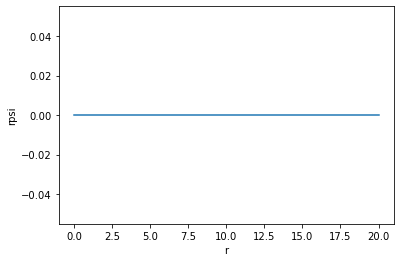

-24.9


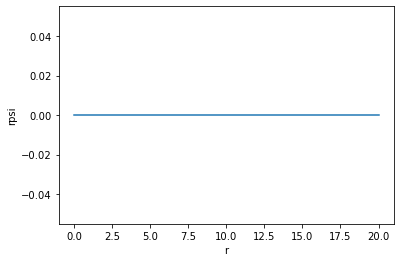

-24.8


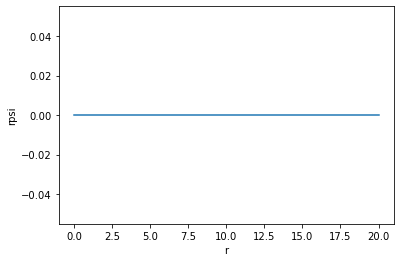

-24.7


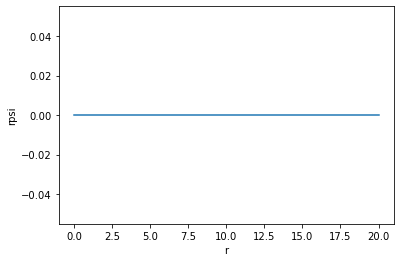

-24.6


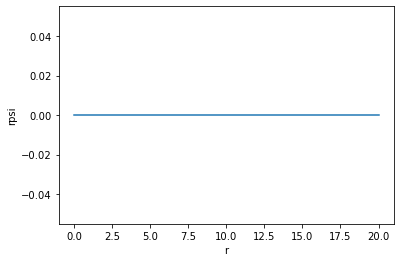

-24.5


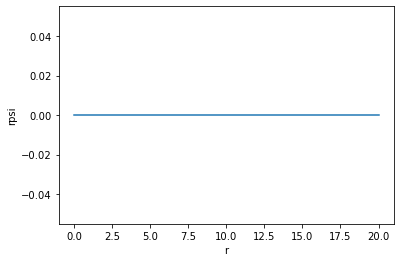

-24.4


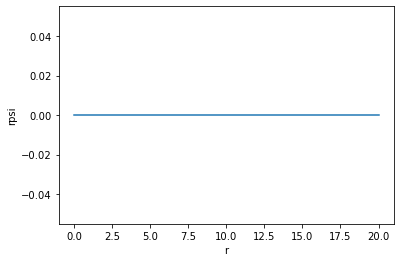

-24.3


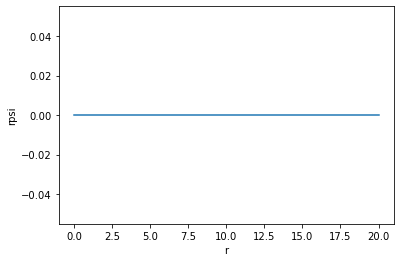

-24.2


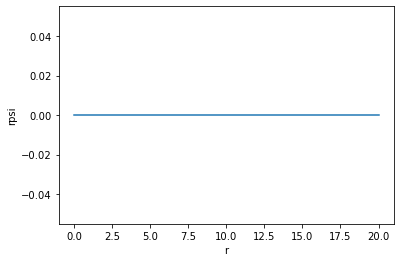

-24.1


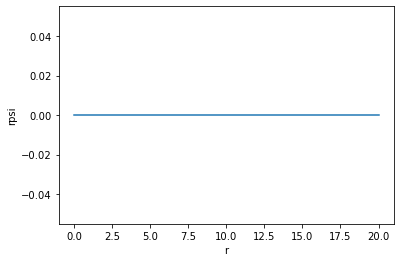

-24.0


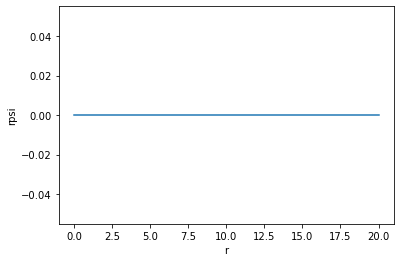

-23.9


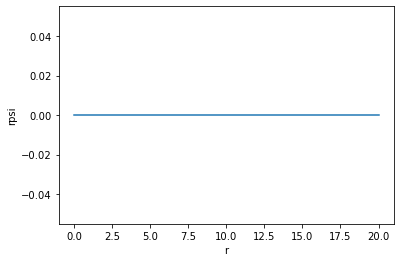

-23.8


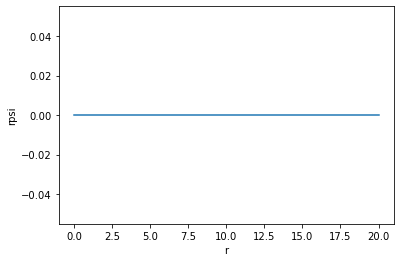

-23.7


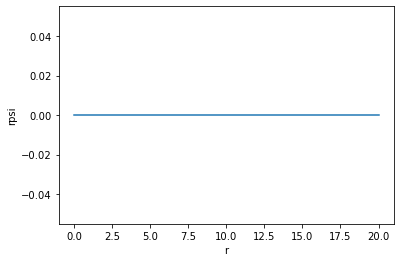

-23.6


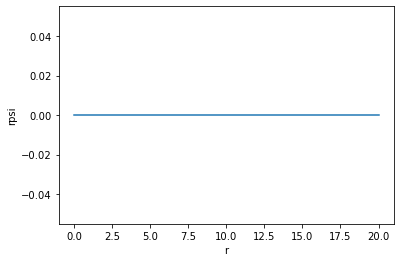

-23.5


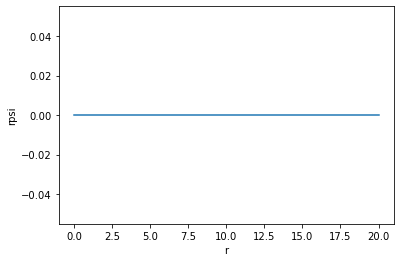

-23.4


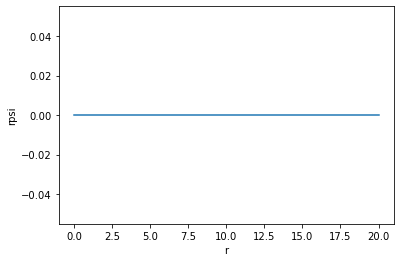

-23.3


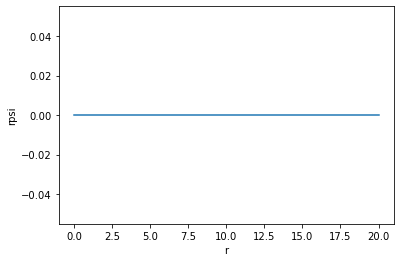

-23.2


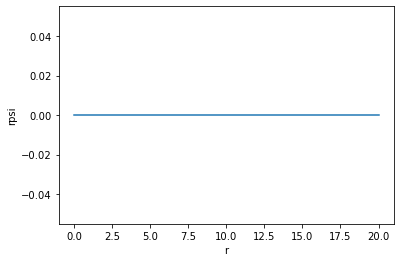

-23.1


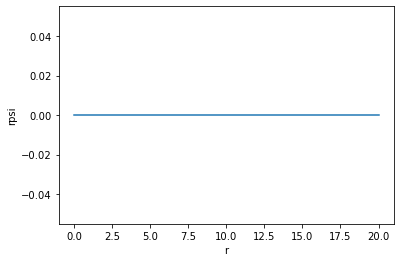

-23.0


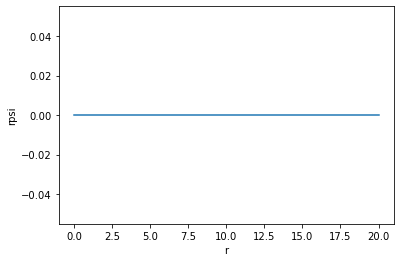

-22.9


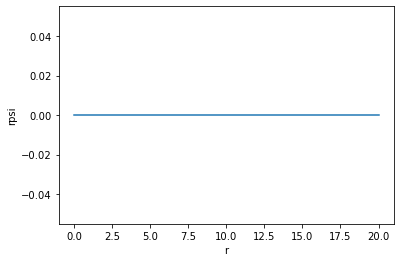

-22.8


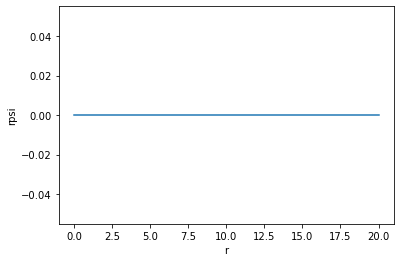

-22.7


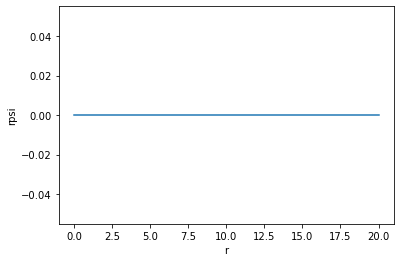

-22.6


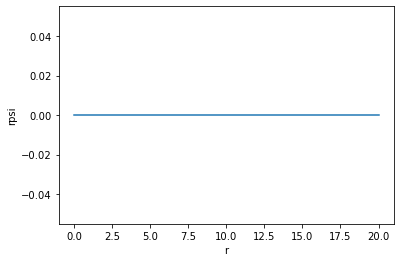

-22.5


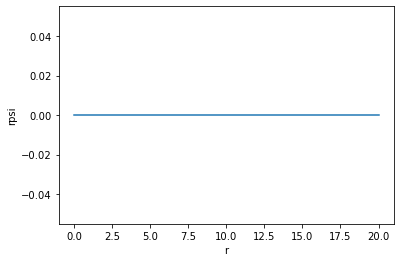

-22.4


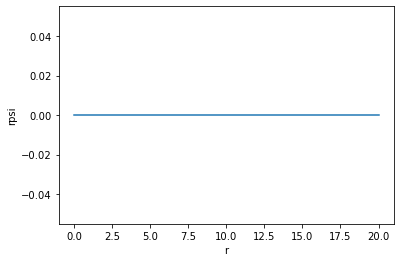

-22.3


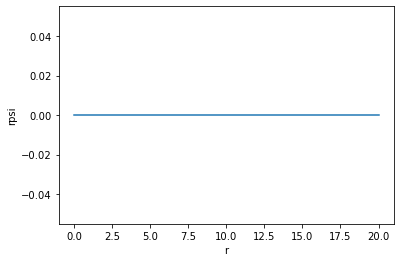

-22.2


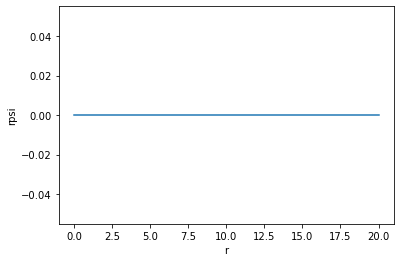

-22.1


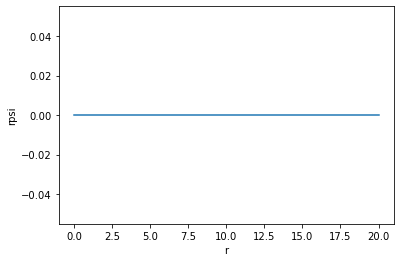

-22.0


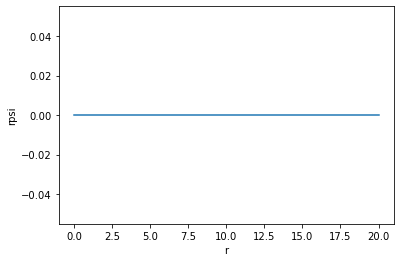

-21.9


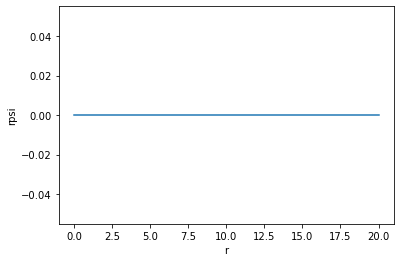

-21.8


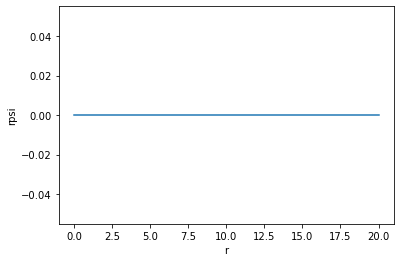

-21.7


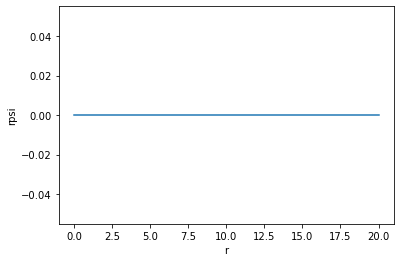

-21.6


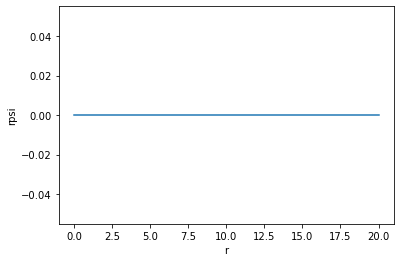

-21.5


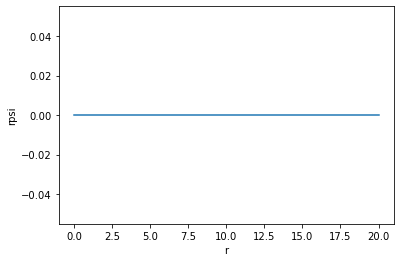

-21.4


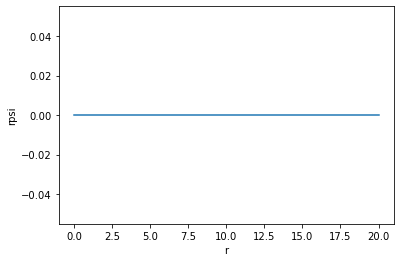

-21.3


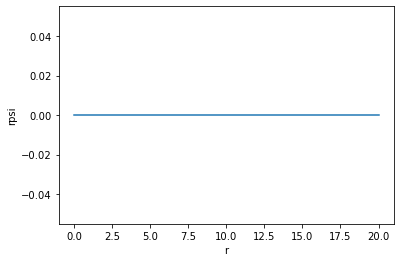

-21.2


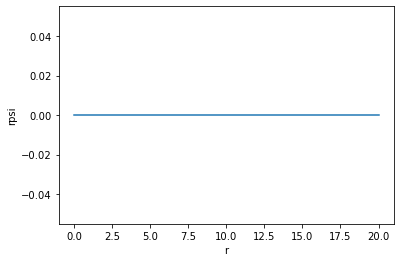

-21.1


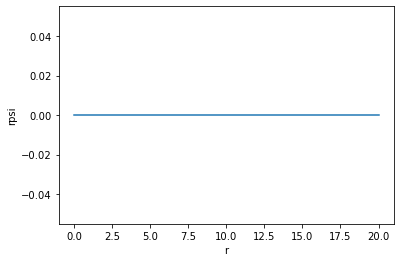

-21.0


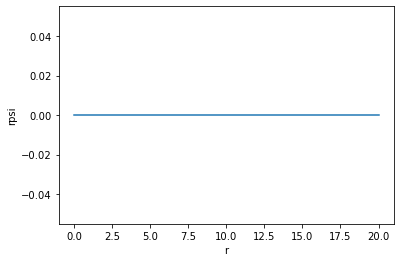

-20.9


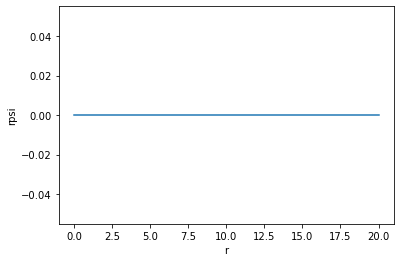

-20.8


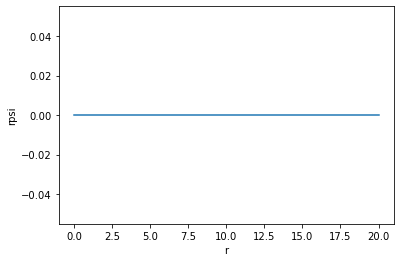

-20.7


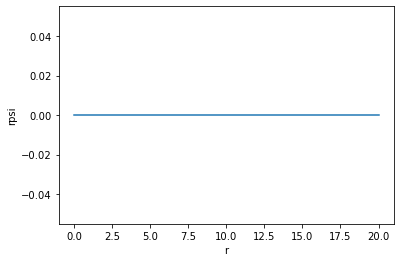

-20.6


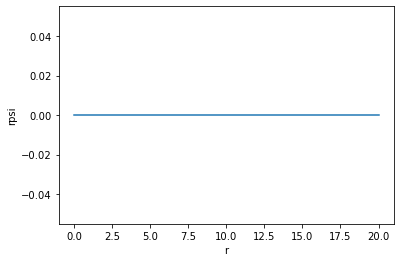

-20.5


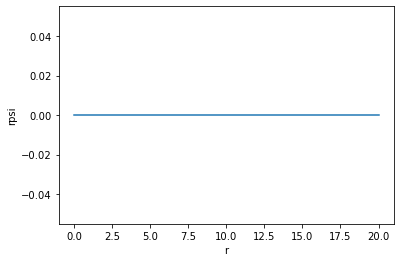

-20.4


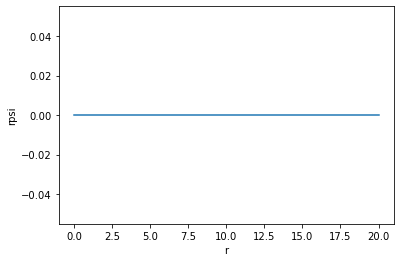

-20.3


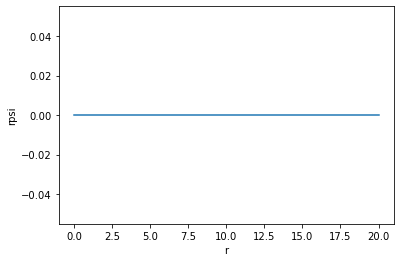

-20.2


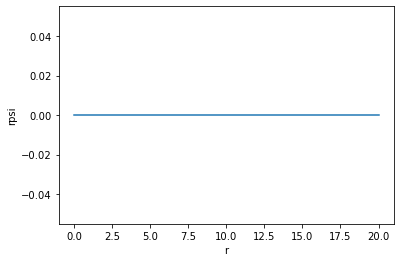

-20.1


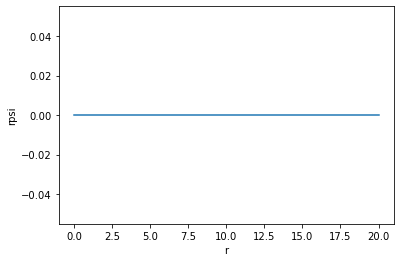

In [110]:
# Use the solver in iterations to find non-trivial eigenvalues
# Plot all solutions
import matplotlib.pyplot as plt
for i in range(50):
    from scipy.integrate import solve_bvp
    sol = solve_bvp(fun, bc, r, rpsi_a, p=[i/10-25])
    # plot and label
    x_plot = np.linspace(0, 20, 50)
    y_plot = sol.sol(x_plot)[0]
    plt.plot(x_plot, y_plot)
    plt.xlabel("r")
    plt.ylabel("rpsi")
    print(i/10-25)
    plt.show()

In [104]:
from scipy.optimize import fsolve